# Práctico Análisis y Visualización

El siguiente trabajo esta pensado para ser entregado en formato de tipo informe en un notebook Python hecho en Jupyter Lab o Google Colab. Debera apuntar a un público técnico con conocimientos generales del tema. 

La presentación de los resultados debe ser clara, apoyar las conclusiones extraidas y ser lo mas sintetico posible. No necesariamente todo lo que prueben debe estar reflejado en el informe. Ciertamente valoramos el esfuerzo de explorar alternativas de análisis y visualización, pero parte del trabajo es elegir también las mas adecuadas. 


-----

----

### Consignas

### 1. Armado del dataset

Inicialmente nuestro conjunto de datos se encuentra distribuido en varios archivos. Es necesario juntar todo en un mismo set de datos para facilitar la manipulacion. 

- Describir las caracteristicas generales de los datasets presentes en los archivos de entrada: Numero de registros, diferencias entre los mismos. 
- Definir conveniencia de usar todos los datos juntos en un mismo dataset o separarlos. 

### 2. Exploración

- De que consta nuestro dataset? que tipo de datos tenemos?
- Nuestra variable a predecir, esta balanceada dentro del dataset etiquetado?
- Que tipo de curacion creen que seria necesaria realizar? Existen datos nulos?
- En base a lo que podemos entender conceptualmente sobre nuestras variables, existe alguna que a priori pueda tener una mayor influencia sobre nuestro objetivo a predecir? por qué?
- Existe correlacion entre las variables del dataset? Cual metodo de cálculo de correlacion conviene usar para este tipo de variables?

### 3. Visualización

- Como se distribuyen las variables? Cuales siguen una distribucion normal y cuales no?
- Explorar las diferencias entre las distribuciones de las distintas variables: 
  - según el paciente
  - según la etiqueta a predecir
  - ambas (usar hue)
- Hay outliers presentes en nuestras distribuciones? habria que sacarlos?

### **Sobre los datos no etiquetados**

Si bien todavia no vamos a predecir una etiqueta, nos interesa entender lo mas posible sobre estos datos para poder entender las predicciones de los modelos.

- Visualizar las distribuciones de las distintas metricas. Se comportan parecido a los etiquetados si eliminaramos las etiquetas? y si las consideramos?

### 4. Conclusiones

Sobre los datos etiquetados: 
- En base al análisis, se pudo encontrar cual(es) son las métricas que mejor diferencian un estado de otro?

Sobre los no etiquetados:
- Conviene analizarlos junto con los que si estan etiquetados? 

### 5. Opcional: Analizar las señales originales y obtener un nuevo cuantificador.

- Para las señales de EEG de un paciente , acceder a cada uno de los datos de EEG

Para cada archivo: 

- Preprocesar las señales (aplicar filtro de pasa banda ) pertenecientes a los 16 canales 
- Analizar la entropía espectral de cada una de las señales y calcular el valor medio sobre todos los canales.
- Almacenar los datos en un Data Frame  

*la entropía espectral se calcula usando el paquete  [antropy](https://github.com/raphaelvallat/antropy) (se instala con $ pip instal antropy). 

El comando es antropy.spectral_entropy(señal, sf=400, method='welch', normalize=True))   (señal es la señal de EEG , los otros parametros quedan fijos)

**RESPUESTAS**

### 1. Armado del dataset
1) Cargado de datos de los distintos csv en dos dataframes: uno para los pacientes etiquetados y otro para los no etiquetados.
 

In [ ]:
from google.colab import drive
import pandas as pd
from google.colab import files 

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SHARED_FOLDER_ALIAS = 'mentoria'
DATASETS_PATH = '/content/drive/MyDrive/' + SHARED_FOLDER_ALIAS + '/data_preprocessed/'

In [ ]:
!ls {DATASETS_PATH}

Data_noEtiquetado_P1.csv  data_preprocessed.zip  Data_test_P3.csv
Data_noEtiquetado_P2.csv  Data_test_P1.csv
Data_noEtiquetado_P3.csv  Data_test_P2.csv


In [ ]:
path = DATASETS_PATH + 'Data_test_P1.csv'
eti_1 = pd.read_csv (path)
print(eti_1)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380   
1         1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333   
2         1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974   
3         1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309   
4         1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037   
...       ...    ...       ...       ...       ...       ...       ...   
1297      1.0    0.0  0.510113  0.281151  0.519344  0.394939  0.164326   
1298      1.0    0.0  0.092055  0.083923  0.034785  0.429554  0.014010   
1299      1.0    0.0  0.343573  0.249455  0.236822  0.460608  0.101302   
1300      1.0    0.0  0.421636  0.269826  0.373106  0.440180  0.148534   
1301      1.0    0.0  0.486570  0.279701  0.481453  0.418555  0.165718   

           STE          Mean        Std      Skew  
0     0.802138  4.426225e-06  15.557899 -0.000629  
1     0

In [ ]:
path = DATASETS_PATH + 'Data_test_P2.csv'
eti_2 = pd.read_csv (path)
print(eti_2)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         2.0    0.0  0.580832  0.285770  0.635451  0.600646  0.397346   
1         2.0    0.0  0.580672  0.285824  0.635267  0.594471  0.395368   
2         2.0    0.0  0.572336  0.285645  0.621824  0.577791  0.377290   
3         2.0    0.0  0.566942  0.285178  0.612575  0.532172  0.319409   
4         2.0    0.0  0.571565  0.284667  0.619001  0.488914  0.269929   
...       ...    ...       ...       ...       ...       ...       ...   
2341      2.0    0.0  0.510067  0.283269  0.522142  0.594527  0.300433   
2342      2.0    0.0  0.564873  0.286244  0.610203  0.553031  0.350188   
2343      2.0    1.0  0.362519  0.255691  0.271619  0.569788  0.115600   
2344      2.0    0.0  0.570313  0.286206  0.618980  0.576464  0.364877   
2345      2.0    1.0  0.575551  0.286208  0.627219  0.585996  0.372166   

           STE          Mean        Std      Skew  
0     0.788286  3.267524e-06  28.914999  0.001687  
1     0

In [ ]:
path = DATASETS_PATH + '/Data_test_P3.csv'
eti_3 = pd.read_csv (path)
print(eti_3)

      Patient  State        PE        SC       GNE        SE       LZC  \
0         3.0    0.0  0.479441  0.278778  0.469924  0.443475  0.193504   
1         3.0    0.0  0.465473  0.277148  0.447006  0.453844  0.191880   
2         3.0    0.0  0.492096  0.280312  0.490854  0.455807  0.215496   
3         3.0    0.0  0.486271  0.278803  0.480243  0.420207  0.186225   
4         3.0    0.0  0.493036  0.279539  0.491375  0.425493  0.192620   
...       ...    ...       ...       ...       ...       ...       ...   
2389      3.0    0.0  0.448407  0.274937  0.418891  0.460836  0.176777   
2390      3.0    0.0  0.519529  0.283694  0.537028  0.522160  0.294764   
2391      3.0    1.0  0.532872  0.284772  0.558522  0.501966  0.298883   
2392      3.0    0.0  0.506230  0.281294  0.513469  0.417632  0.203651   
2393      3.0    1.0  0.534341  0.285007  0.561251  0.549156  0.325218   

           STE          Mean        Std      Skew  
0     0.702037 -3.287561e-06  63.641488 -0.114232  
1     0

In [ ]:
path = DATASETS_PATH + 'Data_noEtiquetado_P1.csv'
no_eti_1 = pd.read_csv (path)
print(no_eti_1)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         1.0  0.569169  0.285503  0.615967  0.428966  0.269077  0.777645   
1         1.0  0.540103  0.283395  0.568056  0.411565  0.190297  0.751926   
2         1.0  0.489490  0.280860  0.488495  0.465578  0.207542  0.710696   
3         1.0  0.541447  0.283588  0.570310  0.412085  0.204437  0.753217   
4         1.0  0.538152  0.283284  0.565175  0.433228  0.221188  0.750362   
...       ...       ...       ...       ...       ...       ...       ...   
1578      1.0  0.542298  0.285128  0.573605  0.488630  0.277161  0.755518   
1579      1.0  0.577379  0.284919  0.628139  0.436884  0.272968  0.783797   
1580      1.0  0.226923  0.195050  0.055624  0.433121  0.009849  0.473834   
1581      1.0  0.584754  0.285481  0.640814  0.478139  0.304236  0.790763   
1582      1.0  0.574968  0.286049  0.625937  0.531554  0.307196  0.782959   

              Mean        Std      Skew  
0    -1.057214e-06  25.648324 -0.

In [ ]:
path = DATASETS_PATH + 'Data_noEtiquetado_P2.csv'
no_eti_2 = pd.read_csv (path)
print(no_eti_2)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         2.0  0.543140  0.285192  0.575400  0.567177  0.331557  0.756344   
1         2.0  0.563359  0.285882  0.607569  0.570171  0.350779  0.773074   
2         2.0  0.567607  0.285948  0.614490  0.570695  0.355764  0.776774   
3         2.0  0.536664  0.284326  0.563742  0.484500  0.255360  0.749858   
4         2.0  0.559977  0.286096  0.602810  0.575267  0.367414  0.770956   
...       ...       ...       ...       ...       ...       ...       ...   
2250      2.0  0.533825  0.285128  0.560528  0.571857  0.319525  0.748658   
2251      2.0  0.545316  0.284808  0.578572  0.553390  0.321308  0.757611   
2252      2.0  0.563391  0.285437  0.607543  0.572141  0.355057  0.772917   
2253      2.0  0.558770  0.286094  0.600623  0.570037  0.357030  0.769709   
2254      2.0  0.556619  0.285598  0.596886  0.563835  0.343863  0.767469   

              Mean        Std      Skew  
0     1.431100e-06  36.323471 -0.

In [ ]:
path = DATASETS_PATH + 'Data_noEtiquetado_P3.csv'
no_eti_3 = pd.read_csv (path)
print(no_eti_3)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         3.0  0.514282  0.282691  0.527403  0.448487  0.240336  0.731327   
1         3.0  0.506499  0.281004  0.513663  0.436929  0.217204  0.724142   
2         3.0  0.265320  0.219342  0.094050  0.478747  0.028796  0.545101   
3         3.0  0.538652  0.285217  0.568074  0.540223  0.318799  0.752409   
4         3.0  0.486665  0.279066  0.481342  0.413653  0.202887  0.708214   
...       ...       ...       ...       ...       ...       ...       ...   
2276      3.0  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
2277      3.0  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
2278      3.0  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
2279      3.0  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
2280      3.0  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

              Mean        Std      Skew  
0    -2.796789e-07  42.024412 -0.

In [ ]:
eti_1.dtypes

Patient    float64
State      float64
PE         float64
SC         float64
GNE        float64
SE         float64
LZC        float64
STE        float64
Mean       float64
Std        float64
Skew       float64
dtype: object

In [ ]:
all_labeled = [eti_1, eti_2, eti_3]
  
all_labeled = pd.concat(all_labeled)
display(all_labeled)

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,4.426225e-06,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
3,1.0,0.0,0.535949,0.282724,0.560678,0.391206,0.166309,0.747854,-1.353617e-05,48.590217,-0.024175
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401
...,...,...,...,...,...,...,...,...,...,...,...
2389,3.0,0.0,0.448407,0.274937,0.418891,0.460836,0.176777,0.677723,-1.282332e-05,42.577215,-0.120935
2390,3.0,0.0,0.519529,0.283694,0.537028,0.522160,0.294764,0.736046,8.581803e-06,27.410843,-0.009101
2391,3.0,1.0,0.532872,0.284772,0.558522,0.501966,0.298883,0.747369,-2.371154e-06,29.862033,0.157132
2392,3.0,0.0,0.506230,0.281294,0.513469,0.417632,0.203651,0.724019,-2.262278e-06,38.568322,0.005107


In [ ]:
all_not_labeled = pd.concat([no_eti_1,no_eti_2,no_eti_3])
print(all_not_labeled)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         1.0  0.569169  0.285503  0.615967  0.428966  0.269077  0.777645   
1         1.0  0.540103  0.283395  0.568056  0.411565  0.190297  0.751926   
2         1.0  0.489490  0.280860  0.488495  0.465578  0.207542  0.710696   
3         1.0  0.541447  0.283588  0.570310  0.412085  0.204437  0.753217   
4         1.0  0.538152  0.283284  0.565175  0.433228  0.221188  0.750362   
...       ...       ...       ...       ...       ...       ...       ...   
2276      3.0  0.516479  0.282887  0.531147  0.464275  0.250580  0.732868   
2277      3.0  0.487934  0.279556  0.483639  0.444114  0.207290  0.708959   
2278      3.0  0.529587  0.283785  0.552341  0.490122  0.269728  0.744144   
2279      3.0  0.493372  0.280451  0.493013  0.443925  0.209394  0.713554   
2280      3.0  0.483616  0.278193  0.475671  0.416879  0.187882  0.705065   

              Mean        Std      Skew  
0    -1.057214e-06  25.648324 -0.

En base a lo observado anteriormente, vemos que hay distintas cantidades de registros de señales de cada paciente, y que los datos etiquetados a diferencia de los datos no etiquetados, tienen una columna más, la columna 'State'.
Para respetar el orden en el que venían los datos, decidimos concatenar  por un lado los datos etiquetados: **all_labeled**, y los no etiquetados por el otro **all_not_labeled**.

### 2. Exploración




- Los datasets contienen información recolectada de electroencefalogramas de 3 pacientes diferentes por 16 canales. Se eligieron 9 medidas de resumen de esas señales que forman parte de los datasets. Todas estas variables son númericas de tipo flotante. Nos llamó la atención el contenido de la columna 'State' de los datos etiquetados que si bien su contenido es numérico (0 y 1), consideramos que se trataría de una variable categórica al distinguir entre el estado pre-ictal de los demás. 

In [ ]:
all_labeled['State'].value_counts()

0.0    5592
1.0     450
Name: State, dtype: int64

- La variable a predecir 'State' estaría desbalanceada, ya que podemos observar que sólo el 7,45% de los datos del dataset corresponde a señales pre-ictales (etiquetadas con 1).

In [ ]:
#Eliminamos la columna 'State' de los datos etquetados
all_labeled_no_state = all_labeled.drop(columns=['State'])
print(all_labeled_no_state)

      Patient        PE        SC       GNE        SE       LZC       STE  \
0         1.0  0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1         1.0  0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2         1.0  0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3         1.0  0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4         1.0  0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   
...       ...       ...       ...       ...       ...       ...       ...   
2389      3.0  0.448407  0.274937  0.418891  0.460836  0.176777  0.677723   
2390      3.0  0.519529  0.283694  0.537028  0.522160  0.294764  0.736046   
2391      3.0  0.532872  0.284772  0.558522  0.501966  0.298883  0.747369   
2392      3.0  0.506230  0.281294  0.513469  0.417632  0.203651  0.724019   
2393      3.0  0.534341  0.285007  0.561251  0.549156  0.325218  0.748813   

              Mean        Std      Skew  
0     4.426225e-06  15.557899 -0.

In [ ]:
all_labeled_no_state[all_labeled_no_state['Mean']==0.0]

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
20,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
34,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
47,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
52,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
117,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
489,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
501,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
586,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
726,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0


In [ ]:
all_labeled_no_state[all_labeled_no_state.isna().any(axis=1)]

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
20,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
34,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
47,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
52,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
117,1.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
489,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
501,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
586,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0
726,3.0,0.0,0.0,0.0,NaN,0.000149,0.0,0.0,0.0,0.0


In [ ]:
all_labeled[all_labeled.isna().any(axis=1)]['State'].value_counts()

0.0    56
1.0    15
Name: State, dtype: int64

- Dado que la columna 'Mean' calcula la media de los registros de señales eléctricas de los 16 electrodos, pensamos que sería interesante analizar si habían registros en el dataset con media = 0, lo que inferiría una falta de información. 
Investigamos el dataset para ver si habían registros con media igual a cero, y observamos que hay 71 filas que cumplen con dicho supuesto, y que el resto de las variables de estos mismos registros también son 0  (salvo LZC), por lo que concluiríamos que se trata de registros sin datos.

- Analizamos a su vez los registros en los que habían NaN en el dataset, y vimos que son los mismos que tienen media = 0. 
El tipo de curación que aplicaríamos sería descartar todas las filas con NaN, que aparentemente no tienen información en ninguna de las columnas, y representa el 1,2% de los datos etiquetados.
Del 1,2%, 15 registros de los 71 que descartaríamos corresponden a State 1, es decir pre-ictal.


**Correlación de variables del Dataset**

In [ ]:
all_labeled.corr(method='kendall')

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
Patient,1.000000,-0.060150,-0.362392,-0.252885,-0.359585,-0.115668,-0.101203,-0.358364,-0.002033,-0.028689,0.387379
State,-0.060150,1.000000,0.067607,0.070436,0.068448,0.060416,0.067423,0.068466,0.011175,-0.134246,-0.003083
PE,-0.362392,0.067607,1.000000,0.760744,0.989495,0.366144,0.606200,0.985207,-0.008926,-0.084618,-0.216903
SC,-0.252885,0.070436,0.760744,1.000000,0.769838,0.505309,0.732645,0.773937,-0.013869,-0.165781,-0.234364
GNE,-0.359585,0.068448,0.989495,0.769838,1.000000,0.375466,0.615743,0.993476,-0.009239,-0.090425,-0.218100
SE,-0.115668,0.060416,0.366144,0.505309,0.375466,1.000000,0.736229,0.379015,-0.017594,-0.314425,-0.231488
LZC,-0.101203,0.067423,0.606200,0.732645,0.615743,0.736229,1.000000,0.618876,-0.016671,-0.217339,-0.168749
STE,-0.358364,0.068466,0.985207,0.773937,0.993476,0.379015,0.618876,1.000000,-0.009291,-0.092671,-0.219544
Mean,-0.002033,0.011175,-0.008926,-0.013869,-0.009239,-0.017594,-0.016671,-0.009291,1.000000,0.005624,0.004786
Std,-0.028689,-0.134246,-0.084618,-0.165781,-0.090425,-0.314425,-0.217339,-0.092671,0.005624,1.000000,-0.046337


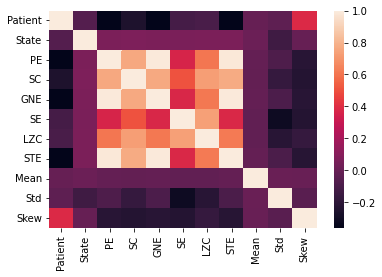

In [ ]:
#este metodo analiza correlaciones no necesariamente lineales
#(identifica las correlaciones lineales si hubiera)
#es un test no parametrico, no asume distribuciones de las variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(all_labeled.corr(method='kendall'))
plt.show()

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.heatmap(all_labeled.corr())
#plt.show()

Con el método de correlación utilizado, podemos observar que existen variables que parecerían estar correlacionadas linealmente tales como PE-STE y PE-GNE. También identificamos alta correlación (no lineal) entre SC-PE, SC-GNE, SC-LZC, SC-STE y SE-LZC.

- En base a lo que podemos entender conceptualmente sobre nuestras variables, existe alguna que a priori pueda tener una mayor influencia sobre nuestro objetivo a predecir? por qué?

En lo que sigue, graficamos la distribución de cada medida de resumen de los datos etiquetados separados por estado 0 o 1 (sin distinción por paciente) para entender si las distribuciones entre estos datos son similares. Para poder compararlas, ya que los datos están desbalanceados, graficamos en cada caso la distribución de las proporciones (dividiendo por la cantidad de datos totales con cada etiqueta en cada caso).

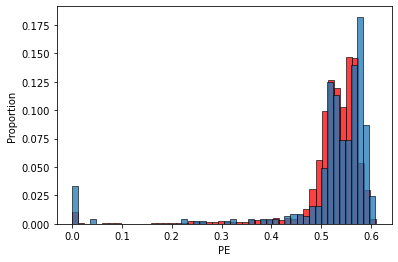

In [ ]:
state_0 = all_labeled[all_labeled['State'] == 0]
state_1 = all_labeled[all_labeled['State'] == 1]

sns.histplot(state_0['PE'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['PE'], bins=50, stat="proportion")

(0.2, 0.3)

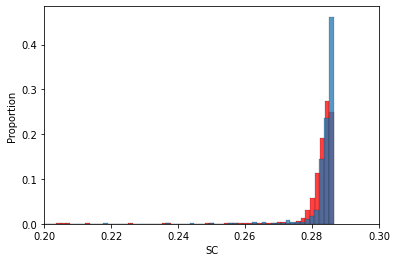

In [ ]:
sns.histplot(state_0['SC'], bins=200, color="red", stat="proportion")
sns.histplot(state_1['SC'], bins=200, stat="proportion")
plt.xlim(0.2, 0.3)

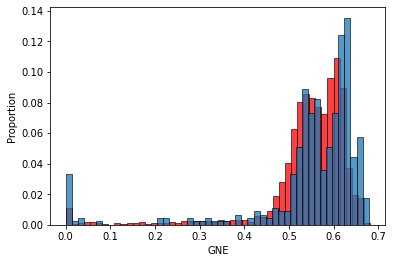

In [ ]:
sns.histplot(state_0['GNE'], bins=50, color="red",stat="proportion")
sns.histplot(state_1['GNE'], bins=50, stat="proportion")

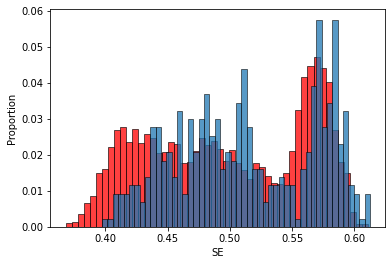

In [ ]:
sns.histplot(state_0['SE'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['SE'], bins=50, stat="proportion")

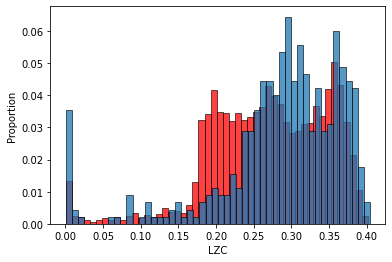

In [ ]:
sns.histplot(state_0['LZC'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['LZC'], bins=50, stat="proportion")

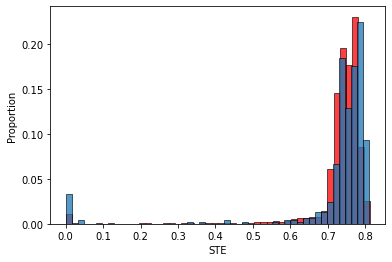

In [ ]:
sns.histplot(state_0['STE'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['STE'], bins=50, stat="proportion")

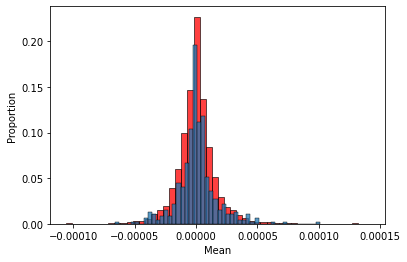

In [ ]:
sns.histplot(state_0['Mean'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['Mean'], bins=50, stat="proportion")

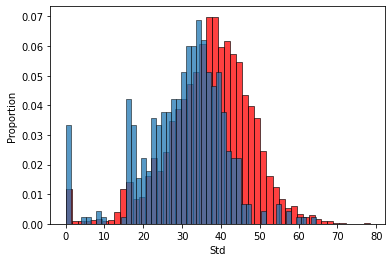

In [ ]:
sns.histplot(state_0['Std'], bins=50, color="red", stat="proportion")
sns.histplot(state_1['Std'], bins=50,stat="proportion")

(-1.0, 1.0)

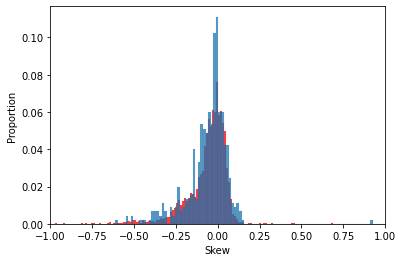

In [ ]:
sns.histplot(state_0['Skew'], bins=1000, color="red", stat="proportion")
sns.histplot(state_1['Skew'], bins=100, stat="proportion")
plt.xlim(-1, 1)
#CONSULTAR

A simple vista, comparando la distribución de los cuantificadores, notamos que existen algunos que permiten una posible distinción entre el estado 0 y el 1 de los pacientes. Entre ellos, se encuentran SE, LZC y Std. El resto de los cuantificadores presenta una distribución similar entre ambos estados, lo que dificultaría la distinción entre ellos.  

### 3. Visualizacion

- Como se distribuyen las variables? Cuales siguen una distribucion normal y cuales no?
- Explorar las diferencias entre las distribuciones de las distintas variables:
según el paciente según la etiqueta a predecir ambas (usar hue)
- Hay outliers presentes en nuestras distribuciones? habria que sacarlos?

Las variables PE, Mean, Std y Skew poseen distribución normal, mientras que SC, GNE, SE, LZC no. Con respecto a la variable STE, pensamos que puede tener distribución normal, sin embargo, notamos la presencia de un sesgo hacia la izquierda que nos hace dudar.
Con respecto a los outliers, vemos la presencia de valores extremos en multiples variables. Consideramos la necesidad de realizar análisis estadisticos más profundos para determinar si sería correcto sacarlos o no. En principio, los outliers podrían contener/mostrar información importante para nuestro objetivo de predicción.  

#### Cuantificadores por paciente 

En lo que sigue, graficamos las distribuciones de cada medida de resumen, diferenciando los estados 0 o 1, para cada paciente. Esto nos permitirá analizar si la distribución condicional de cada variable dado el paciente nos brinda información más específica, por ejemplo, podríamos encontrar alguna variable que distinga entre los estados 0 o 1 en todos los pacientes; o también podría pasar que para un paciente dado, exista una variable que distinga entre diferentes estados mejor que otra y que la misma variable no distinga entre los diferentes estados para otro paciente.

In [ ]:
state_0_P1= state_0[state_0["Patient"]==1.0]
state_1_P1= state_1[state_1["Patient"]==1.0]

state_0_P2= state_0[state_0["Patient"]==2.0]
state_1_P2= state_1[state_1["Patient"]==2.0]

state_0_P3= state_0[state_0["Patient"]==3.0]
state_1_P3= state_1[state_1["Patient"]==3.0]



def plot_for_each_patient(column, xlim=(0, 100), y_lim=(0, 100), bins=50):
  fig, axes = plt.subplots(1, 3, figsize=(20,8))


  #Paciente 1
  sns.histplot(state_0_P1[column], bins=50, color="red", stat="proportion", ax=axes[0]).set_title('Paciente 1')
  sns.histplot(state_1_P1[column], bins=50, stat="proportion", ax=axes[0])

  #Paciente 2
  sns.histplot(state_0_P2[column], bins=50, color="red", stat="proportion", ax=axes[1]).set_title('Paciente 2')
  sns.histplot(state_1_P2[column], bins=50, stat="proportion", ax=axes[1])

  #Paciente3
  sns.histplot(state_0_P3[column], bins=50, color="red", stat="proportion", ax=axes[2]).set_title('Paciente 3')
  sns.histplot(state_1_P3[column], bins=50, stat="proportion", ax=axes[2])

  plt.setp(axes, xlim=xlim, ylim=y_lim)


##### PE

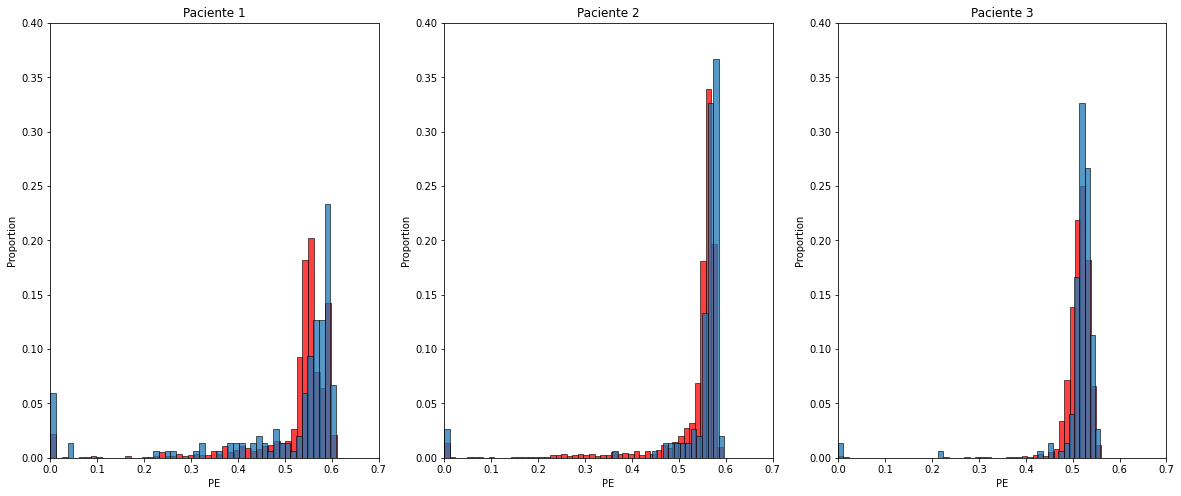

In [ ]:
plot_for_each_patient('PE', xlim=(0, 0.7), y_lim=(0, 0.4), bins=50)


##### SC

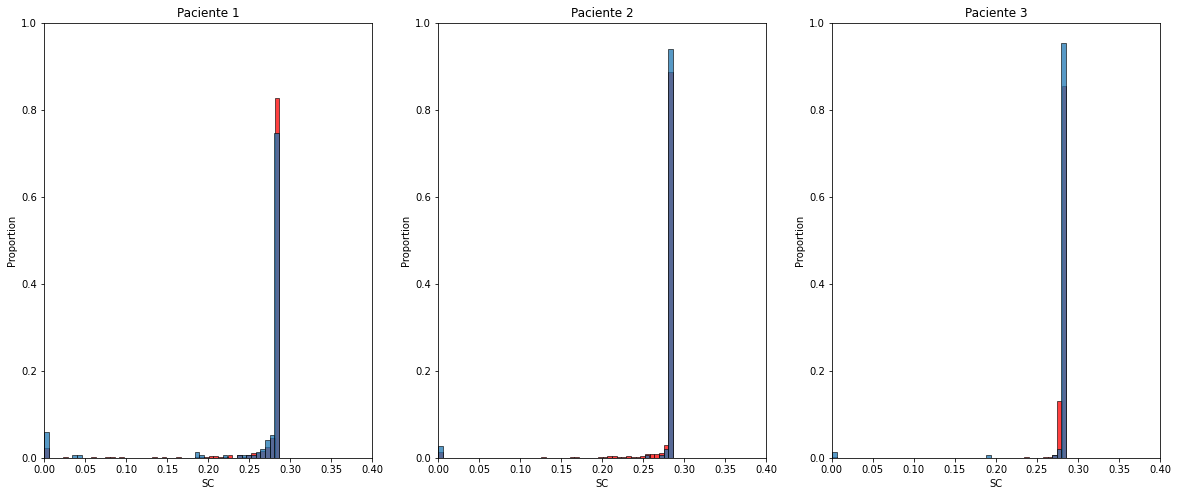

In [ ]:
plot_for_each_patient('SC', xlim=(0, 0.4), y_lim=(0, 1), bins=150)

##### GNE

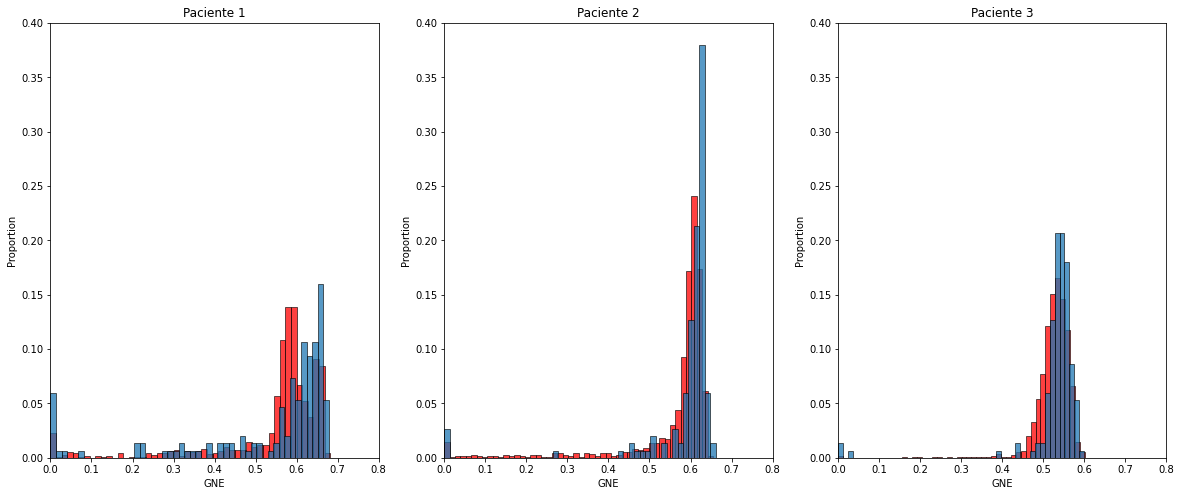

In [ ]:
plot_for_each_patient('GNE', xlim=(0, 0.8), y_lim=(0, 0.4), bins=100)

##### SE

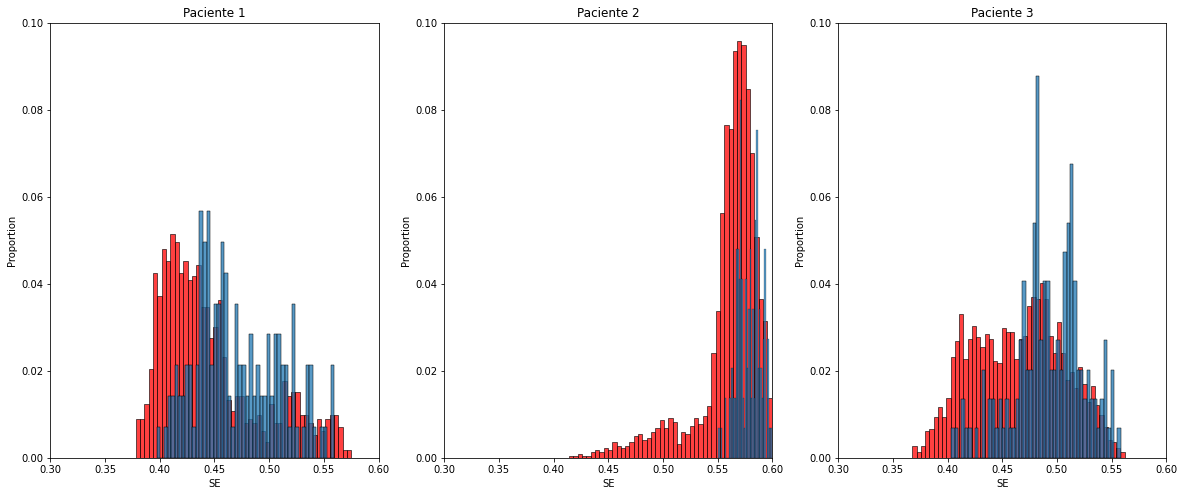

In [ ]:
plot_for_each_patient('SE', xlim=(0.3, 0.6), y_lim=(0, 0.1), bins=50)

##### LZC

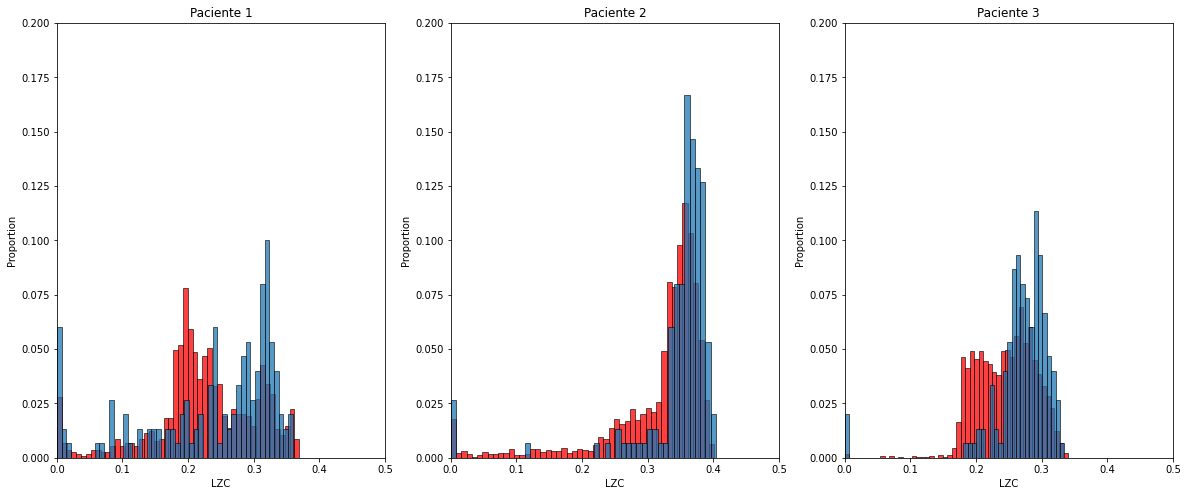

In [ ]:
plot_for_each_patient('LZC', xlim=(0, 0.5), y_lim=(0, 0.2))

##### STE

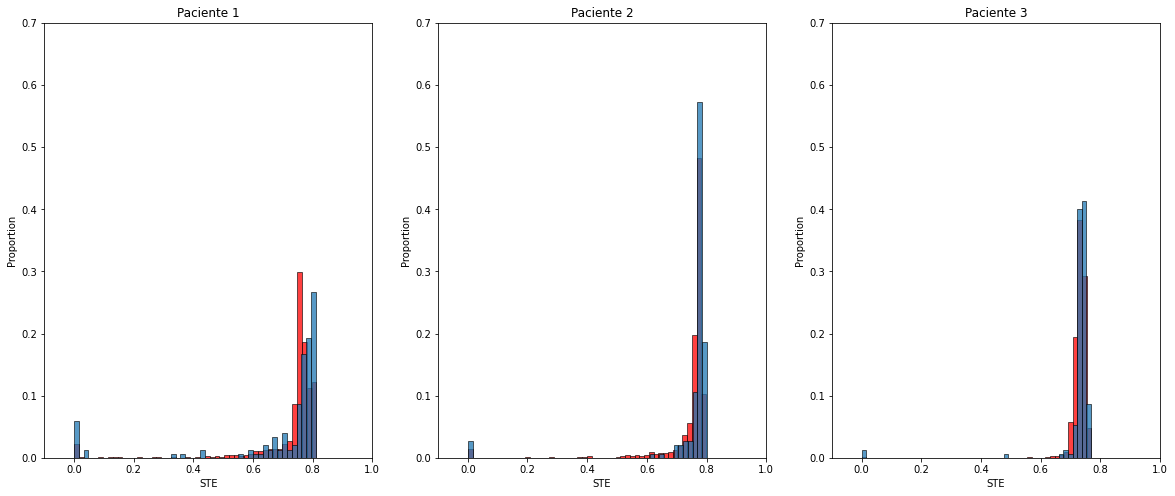

In [ ]:
plot_for_each_patient('STE', xlim=(-0.1, 1), y_lim=(0, 0.7), bins=50)

##### Mean

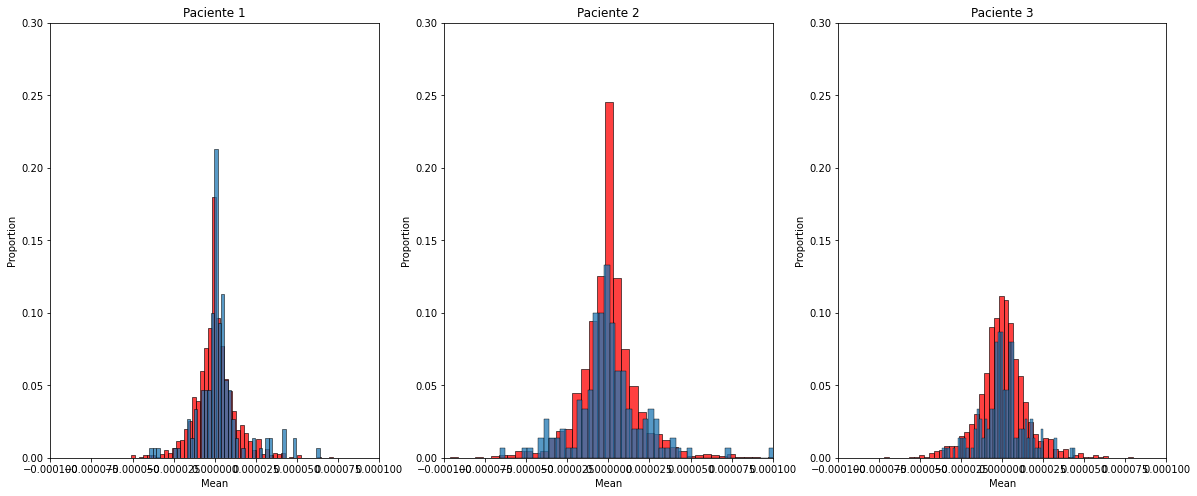

In [ ]:
plot_for_each_patient('Mean', xlim=(-0.0001,0.0001), y_lim=(0, 0.3), bins=50)

##### Std

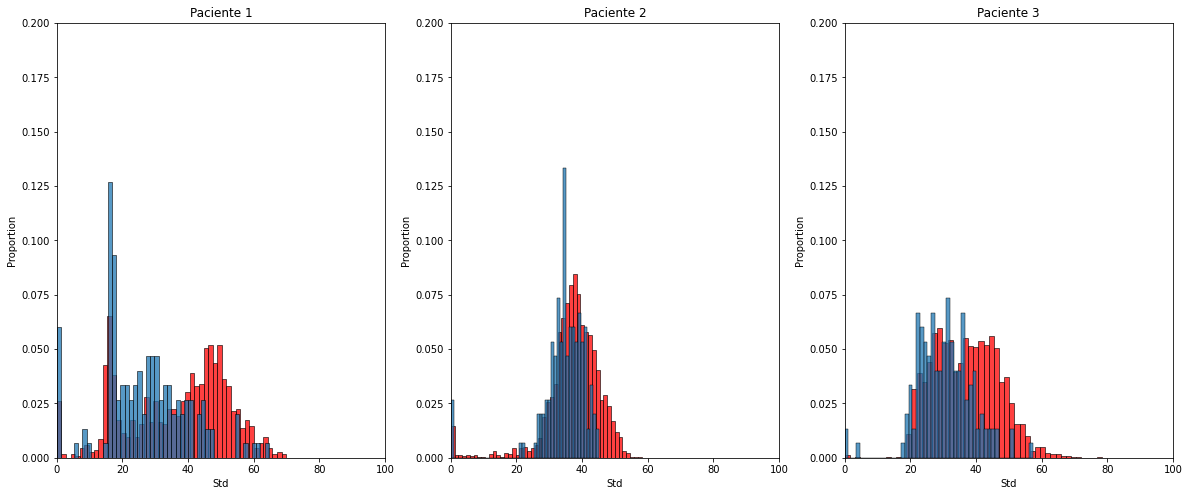

In [ ]:
plot_for_each_patient('Std', xlim=(0, 100), y_lim=(0, 0.2))

##### Skew

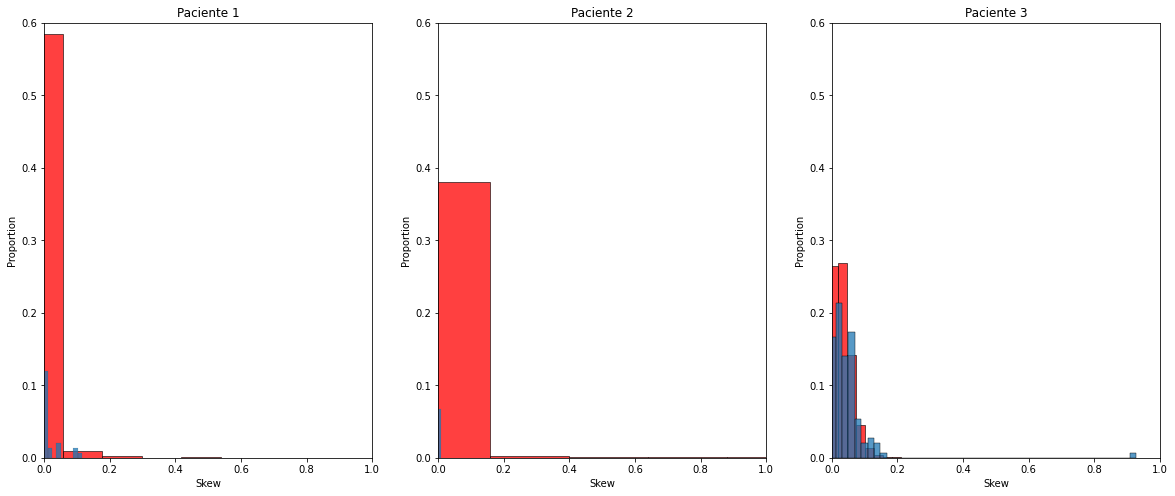

In [ ]:
#queda raro siempre
#CONSULTAR
plot_for_each_patient('Skew', xlim=(0, 1), y_lim=(0, 0.6), bins=100)

A partir de los gráficos podemos observar que las variables que distinguirían mejor entre estados 0 o 1 son:
- Para el **Paciente 1**: Std y LZC.
- Para el **Paciente 2**: GNE y SE.
- Para el **Paciente 3**: SE, LZC y Std.

In [ ]:
all_labeled_State_0 = all_labeled.loc[all_labeled['State'] == 0]


In [ ]:
all_labeled_State_1 = all_labeled.loc[all_labeled['State'] == 1]


In [ ]:
all_labeled_P1= all_labeled[ all_labeled['Patient']==1]
all_labeled_P2= all_labeled[ all_labeled['Patient']==2]
all_labeled_P3= all_labeled[ all_labeled['Patient']==3]



**Ahora graficaremos las distribuciones de cada variable de los datos etiquetados, separados por paciente para ver cómo se comportan.**

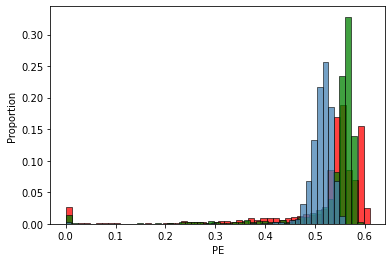

In [ ]:
# PE Por paciente
sns.histplot(all_labeled_P1['PE'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['PE'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['PE'], bins=50,color='steelblue',stat="proportion")

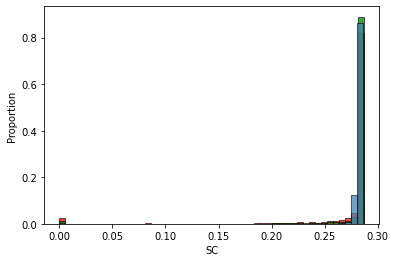

In [ ]:
# SC Por paciente
sns.histplot(all_labeled_P1['SC'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['SC'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['SC'], bins=50,color='steelblue',stat="proportion")

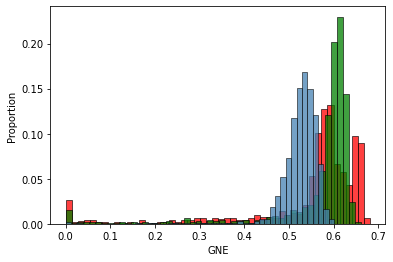

In [ ]:
# GNE Por paciente
sns.histplot(all_labeled_P1['GNE'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['GNE'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['GNE'], bins=50,color='steelblue',stat="proportion")

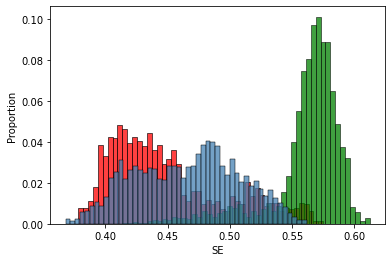

In [ ]:
# SE Por paciente
sns.histplot(all_labeled_P1['SE'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['SE'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['SE'], bins=50,color='steelblue',stat="proportion")

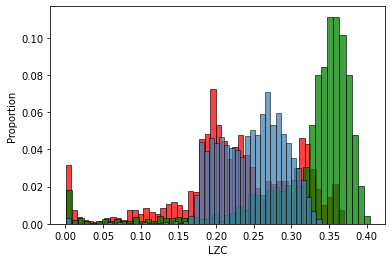

In [ ]:
# LZC Por paciente
sns.histplot(all_labeled_P1['LZC'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['LZC'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['LZC'], bins=50,color='steelblue',stat="proportion")

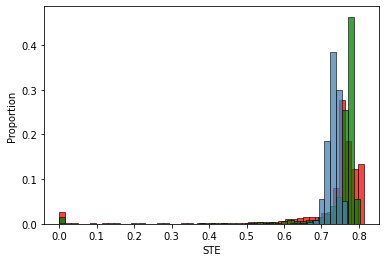

In [ ]:
# STE Por paciente
sns.histplot(all_labeled_P1['STE'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['STE'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['STE'], bins=50,color='steelblue',stat="proportion")

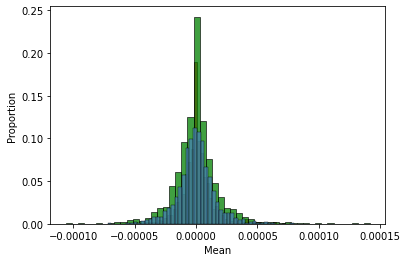

In [ ]:
# Mean Por paciente
sns.histplot(all_labeled_P1['Mean'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['Mean'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['Mean'], bins=50,color='steelblue',stat="proportion")

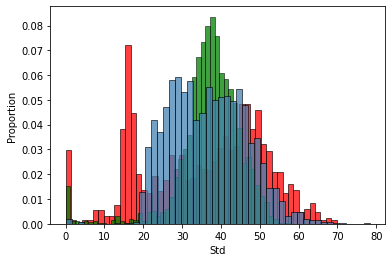

In [ ]:
# Std Por paciente
sns.histplot(all_labeled_P1['Std'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['Std'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['Std'], bins=50,color='steelblue',stat="proportion")

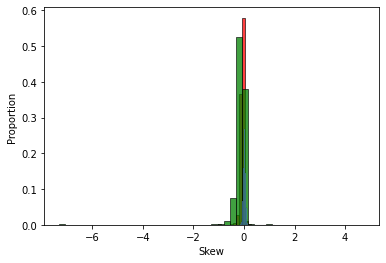

In [ ]:
# Skew Por paciente
sns.histplot(all_labeled_P1['Skew'], bins=50, color="red", stat="proportion")
sns.histplot(all_labeled_P2['Skew'], bins=50,color='green',stat="proportion")
sns.histplot(all_labeled_P3['Skew'], bins=50,color='steelblue',stat="proportion")

Podemos observar que las distribuciones de cada variable por paciente son bastante diferentes, es decir, se comportan distinto según el paciente, lo que nos da un indicio de que el problema debería ser tratado de manera personalizada. Las más notables son SE y LZC.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


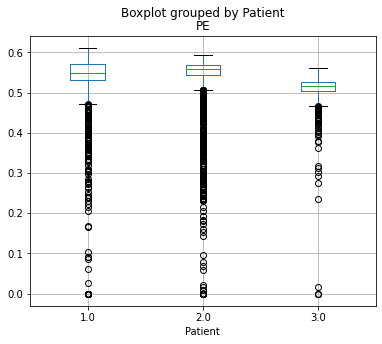

In [ ]:
# PE por Paciente, Estado 0
all_labeled_State_0.boxplot('PE','Patient',grid=True, figsize=(6,5))


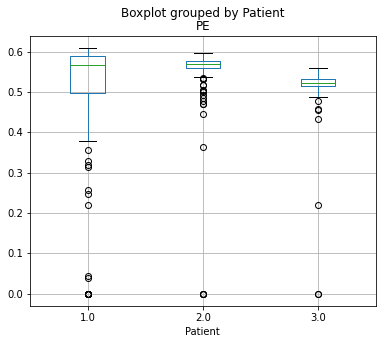

In [ ]:
# PE por Paciente, Estado 1
all_labeled_State_1.boxplot('PE','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


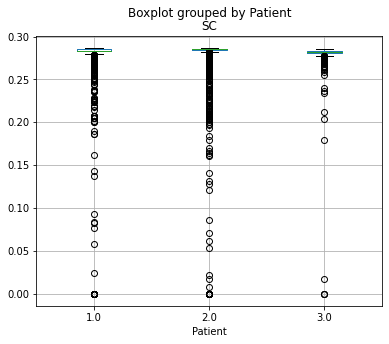

In [ ]:
# SC por Paciente, Estado 0
all_labeled_State_0.boxplot('SC','Patient',grid=True, figsize=(6,5))

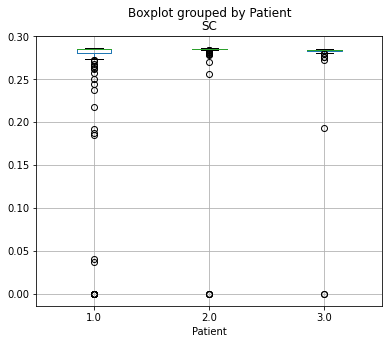

In [ ]:
# SC por Paciente, Estado 1
all_labeled_State_1.boxplot('SC','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


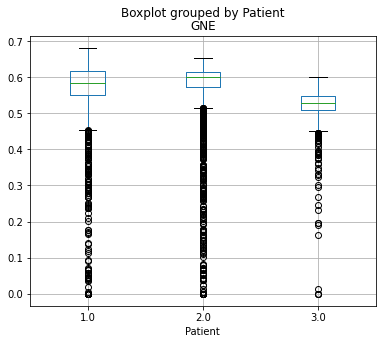

In [ ]:
# GNE por Paciente, Estado 0
all_labeled_State_0.boxplot('GNE','Patient',grid=True, figsize=(6,5))

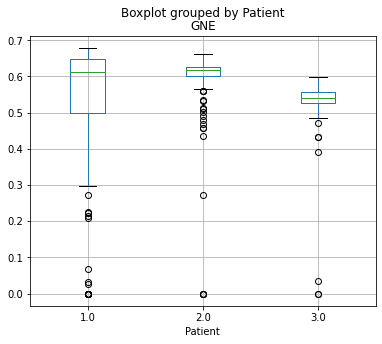

In [ ]:
# GNE por Paciente, Estado 1
all_labeled_State_1.boxplot('GNE','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


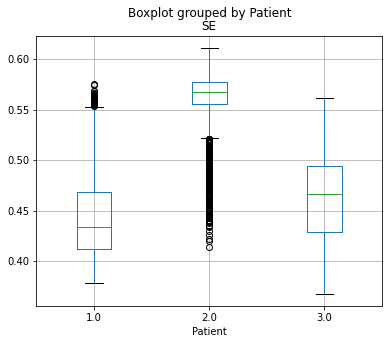

In [ ]:
# SE por Paciente, Estado 0
all_labeled_State_0.boxplot('SE','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


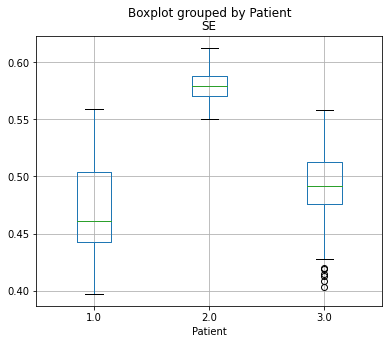

In [ ]:
# SE por Paciente, Estado 1
all_labeled_State_1.boxplot('SE','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


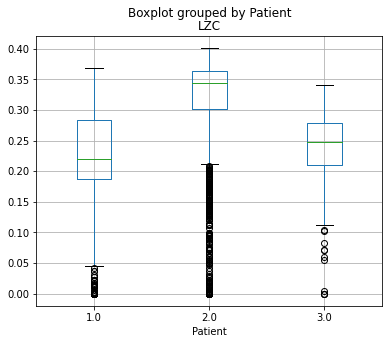

In [ ]:
# LZC por Paciente, Estado 0
all_labeled_State_0.boxplot('LZC','Patient',grid=True, figsize=(6,5))

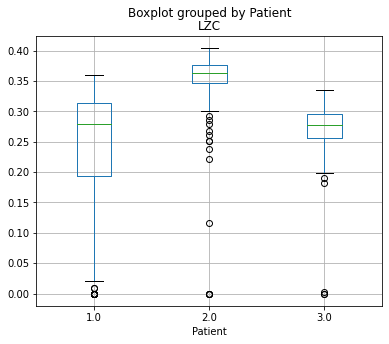

In [ ]:
# LZC por Paciente, Estado 1
all_labeled_State_1.boxplot('LZC','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


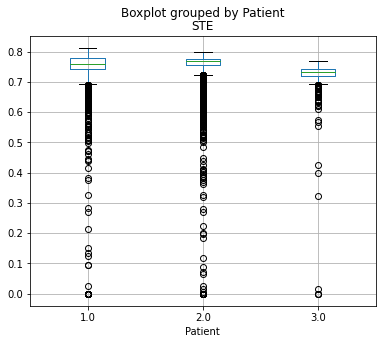

In [ ]:
# STE por Paciente, Estado 0
all_labeled_State_0.boxplot('STE','Patient',grid=True, figsize=(6,5))

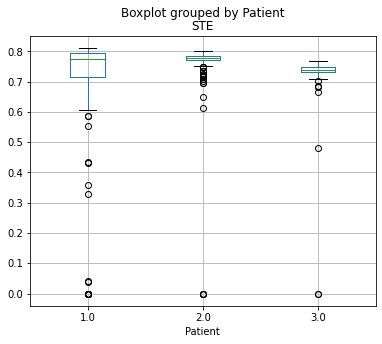

In [ ]:
# STE por Paciente, Estado 1
all_labeled_State_1.boxplot('STE','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


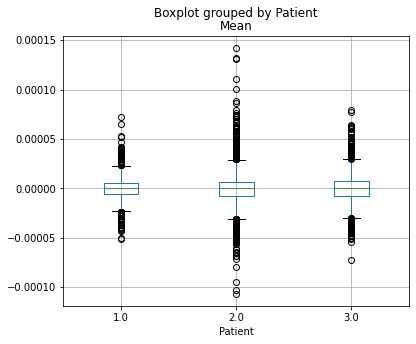

In [ ]:
# Mean por Paciente, Estado 0
all_labeled_State_0.boxplot('Mean','Patient',grid=True, figsize=(6,5))

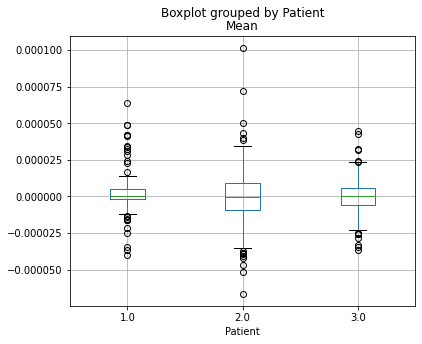

In [ ]:
# Mean por Paciente, Estado 1
all_labeled_State_1.boxplot('Mean','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


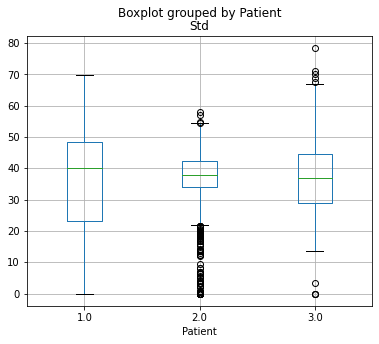

In [ ]:
# Std por Paciente, Estado 0
all_labeled_State_0.boxplot('Std','Patient',grid=True, figsize=(6,5))

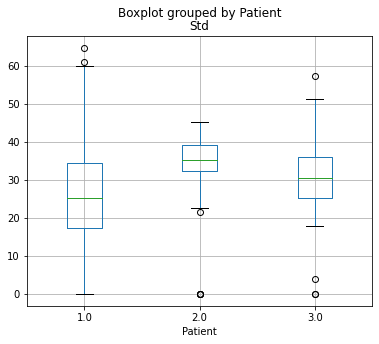

In [ ]:
# Std por Paciente, Estado 1
all_labeled_State_1.boxplot('Std','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


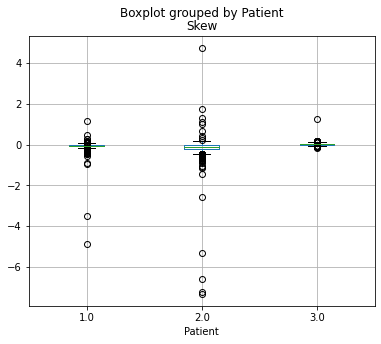

In [ ]:
# Skew por Paciente, Estado 0
all_labeled_State_0.boxplot('Skew','Patient',grid=True, figsize=(6,5))

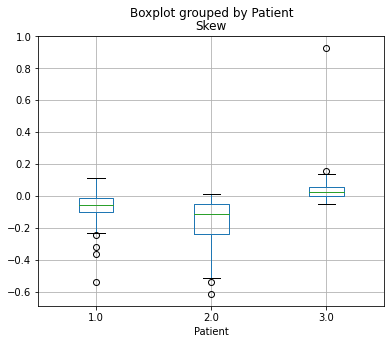

In [ ]:
# Skew por Paciente, Estado 1
all_labeled_State_1.boxplot('Skew','Patient',grid=True, figsize=(6,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff18da78150>,
      dtype=object)

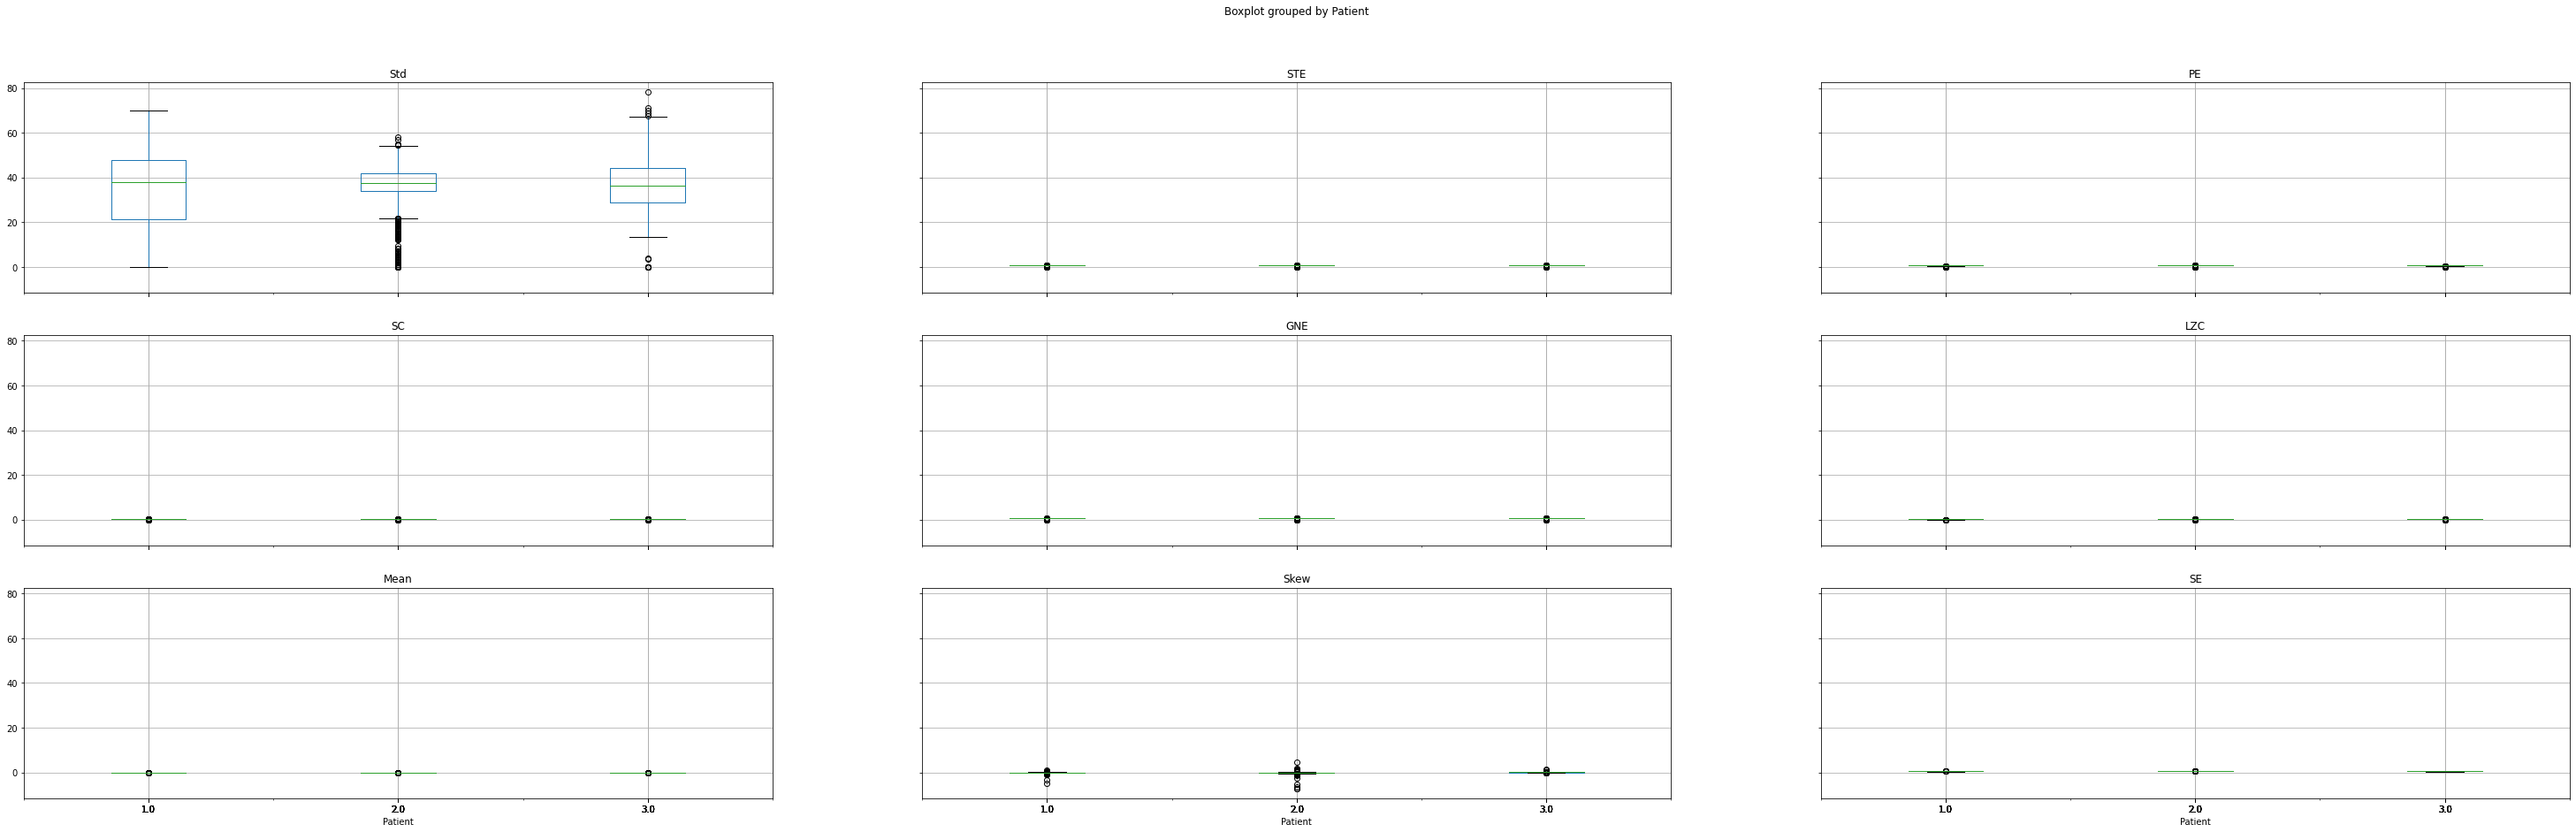

In [ ]:
all_labeled.boxplot(['Std','STE','PE','SC','GNE','LZC','Mean','Skew','SE'],'Patient',grid=True, figsize=(50,15))
#all_labeled.boxplot('STE','Patient',grid=True, figsize=(20,15))

En base a lo expuesto anteriormente, reafirmamos la teoría de que existen algunos cuantificadores que serían útiles para diferenciar entre estados, mientras que otros no.
Además, podemos observar que los valores de las señales para cada cuantificador son diferentes, en muchos casos, para cada paciente, lo que nos inclina a pensar que se podría personalizar la elección del cuantificador predictor al caso estudiado. 

### Sobre los datos no etiquetados

Visualizar las distribuciones de las distintas metricas. Se comportan parecido a los etiquetados si eliminaramos las etiquetas? y si las consideramos?

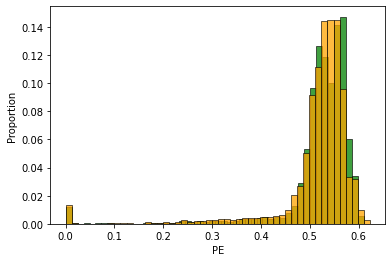

In [ ]:
#PE comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['PE'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['PE'], bins=50, color='orange', stat='proportion')

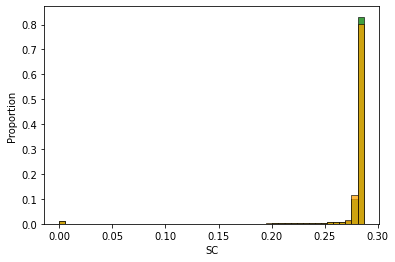

In [ ]:
#SC comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['SC'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['SC'], bins=50, color='orange', stat='proportion')

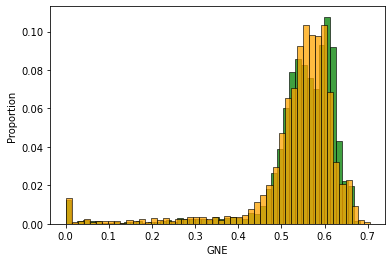

In [ ]:
#GNE comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['GNE'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['GNE'], bins=50, color='orange', stat='proportion')

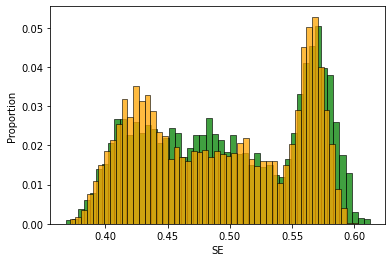

In [ ]:
#SE comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['SE'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['SE'], bins=50, color='orange', stat='proportion')

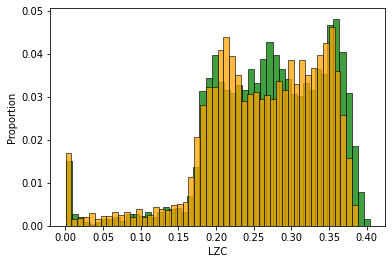

In [ ]:
#LZC comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['LZC'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['LZC'], bins=50, color='orange', stat='proportion')

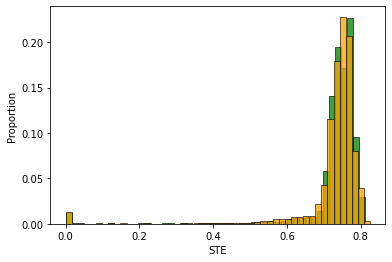

In [ ]:
#STE comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['STE'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['STE'], bins=50, color='orange', stat='proportion')

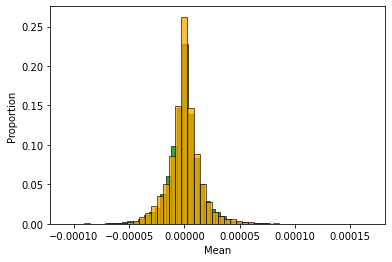

In [ ]:
#Mean comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['Mean'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['Mean'], bins=50, color='orange', stat='proportion')

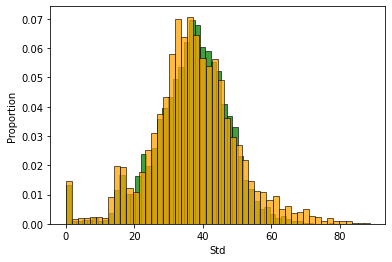

In [ ]:
#Std comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['Std'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['Std'], bins=50, color='orange', stat='proportion')

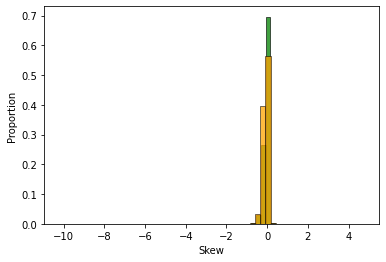

In [ ]:
#Skew comparando datos etiquetados vs. no etiquetados
#SIN distincion por paciente
sns.histplot(all_labeled_no_state['Skew'], bins=50, color='green', stat='proportion')
sns.histplot(all_not_labeled['Skew'], bins=50, color='orange', stat='proportion')

Los gráficos anteriores nos sirven para confirmar que los datos provienen del mismo tipo de muestra (las variables tienen la misma distribución etiquetados vs. no etiquetados, sin distinción por paciente).

En lo que sigue compararemos las distribuciones de cada medida de resumen, por paciente, distinguiendo entre datos etiquetados vs. no etiquetados.

In [ ]:
def plot_for_each_patient_unlabeled(column, xlim=(0, 100), ylim=(0, 100), bins=50):
  fig, axes = plt.subplots(1, 2, figsize=(20,8))

  # No etiquetados
  #Paciente 1
  sns.histplot(all_not_labeled[all_not_labeled['Patient'] == 1][column], bins=50, color="green", stat="proportion", ax=axes[0]).set_title('No etiquetados')
  
  #Paciente 2
  sns.histplot(all_not_labeled[all_not_labeled['Patient'] == 2][column], bins=50, color="red", stat="proportion",ax=axes[0]).set_title('No etiquetados')

  #Paciente3
  sns.histplot(all_not_labeled[all_not_labeled['Patient'] == 3][column], bins=50, color="blue", stat="proportion", ax=axes[0]).set_title('No etiquetados')

  # Etiquetados
  #Paciente 1
  sns.histplot(all_labeled[all_labeled['Patient'] == 1][column], bins=50, color="green", stat="proportion", ax=axes[1]).set_title('Etiquetados')

  #Paciente 2
  sns.histplot(all_labeled[all_labeled['Patient'] == 2][column], bins=50, color="red", stat="proportion",ax=axes[1]).set_title('Etiquetados')
  #Paciente3
  sns.histplot(all_labeled[all_labeled['Patient'] == 3][column], bins=50, color="blue", stat="proportion", ax=axes[1]).set_title('Etiquetados')

  plt.setp(axes)


###### PE

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

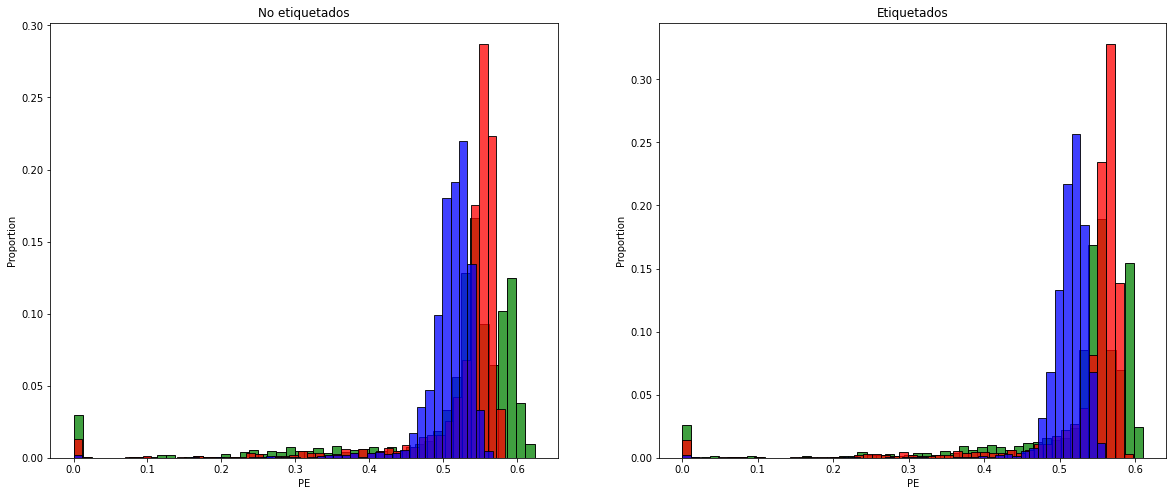

In [ ]:
plot_for_each_patient_unlabeled('PE')

##### SC

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

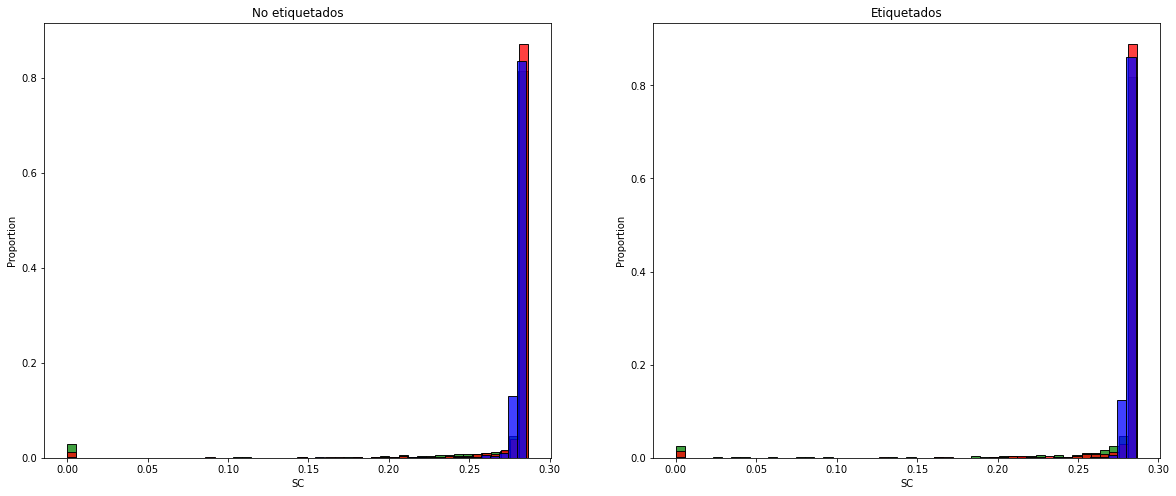

In [ ]:
plot_for_each_patient_unlabeled('SC')

##### GNE

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

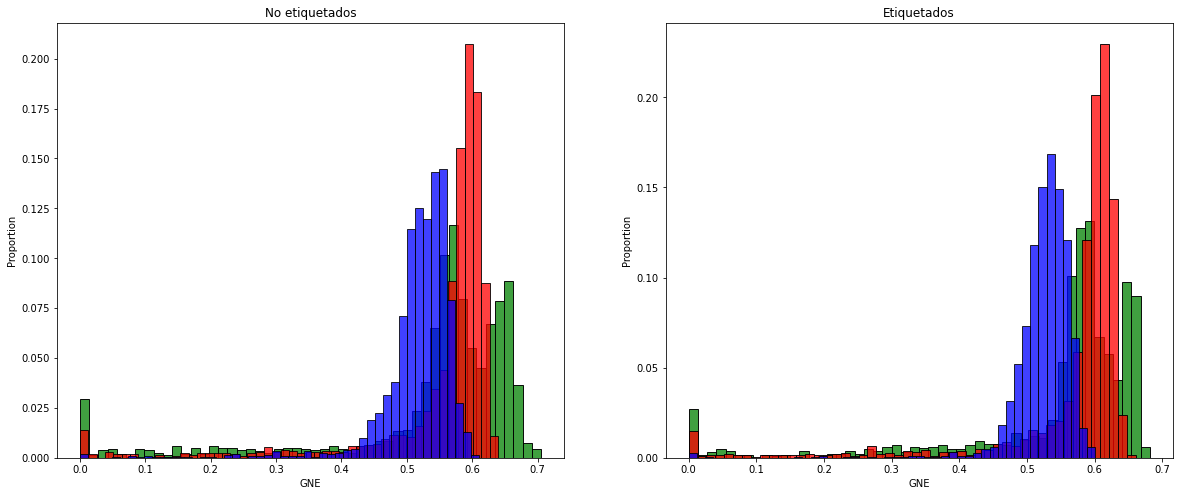

In [ ]:
plot_for_each_patient_unlabeled('GNE')

##### SE

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

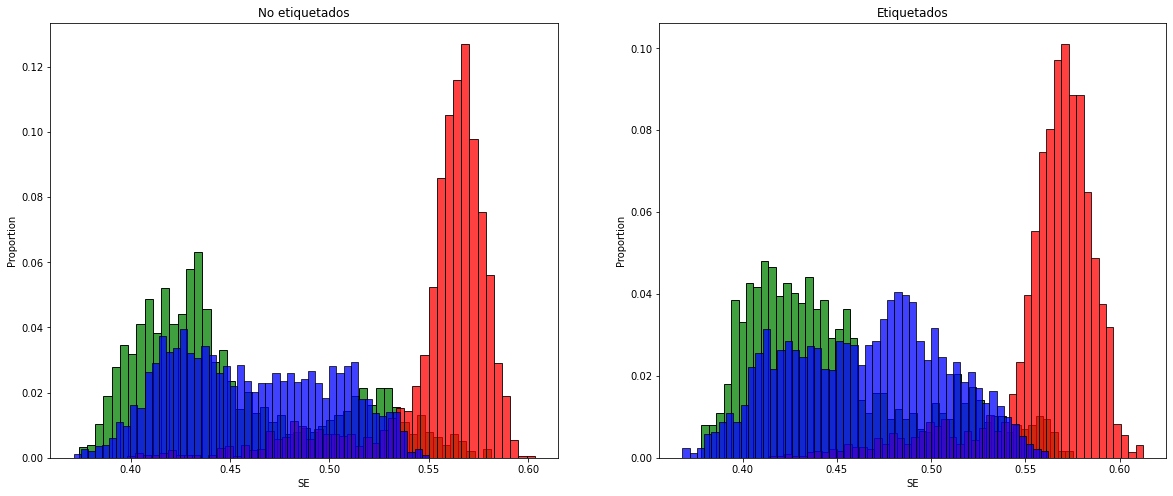

In [ ]:
plot_for_each_patient_unlabeled('SE')

##### LZC 

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

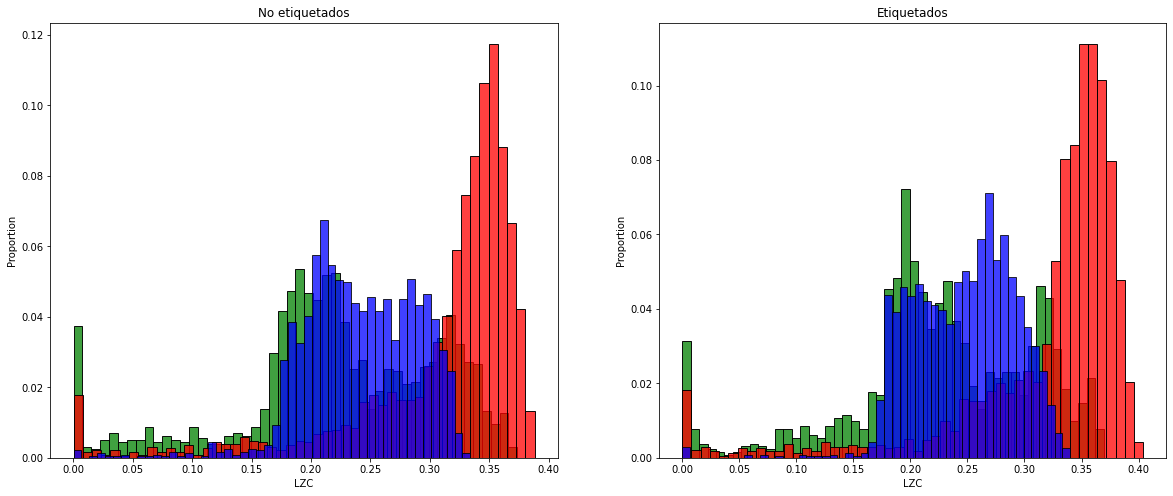

In [ ]:
plot_for_each_patient_unlabeled('LZC')


##### STE

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

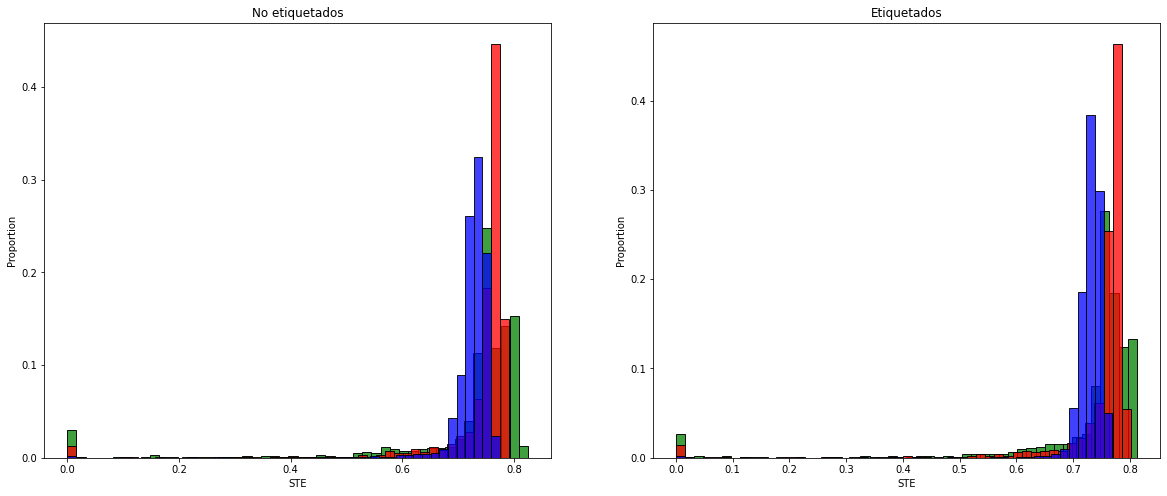

In [ ]:
plot_for_each_patient_unlabeled('STE')

##### Mean

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

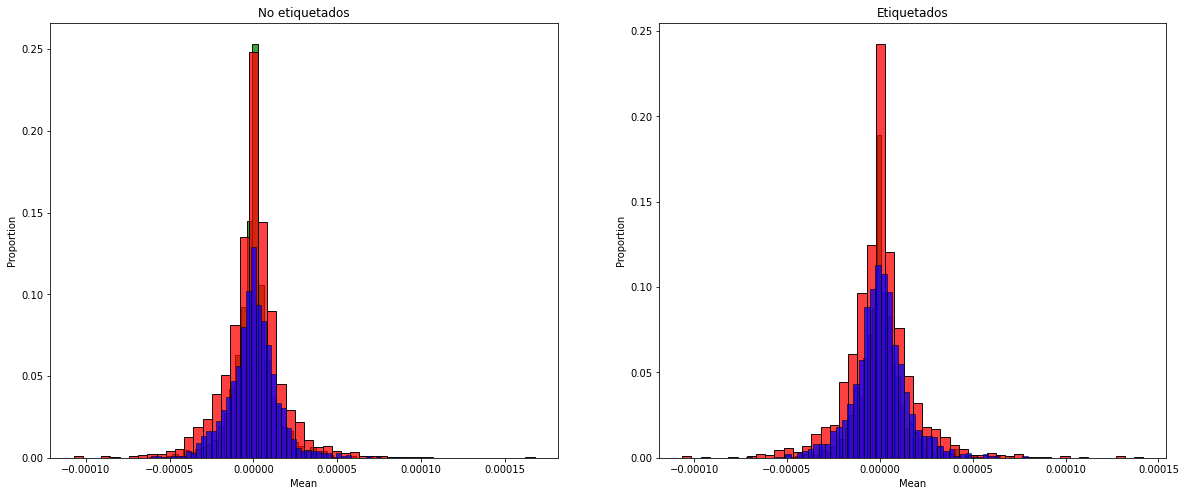

In [ ]:
plot_for_each_patient_unlabeled('Mean')

##### Std

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

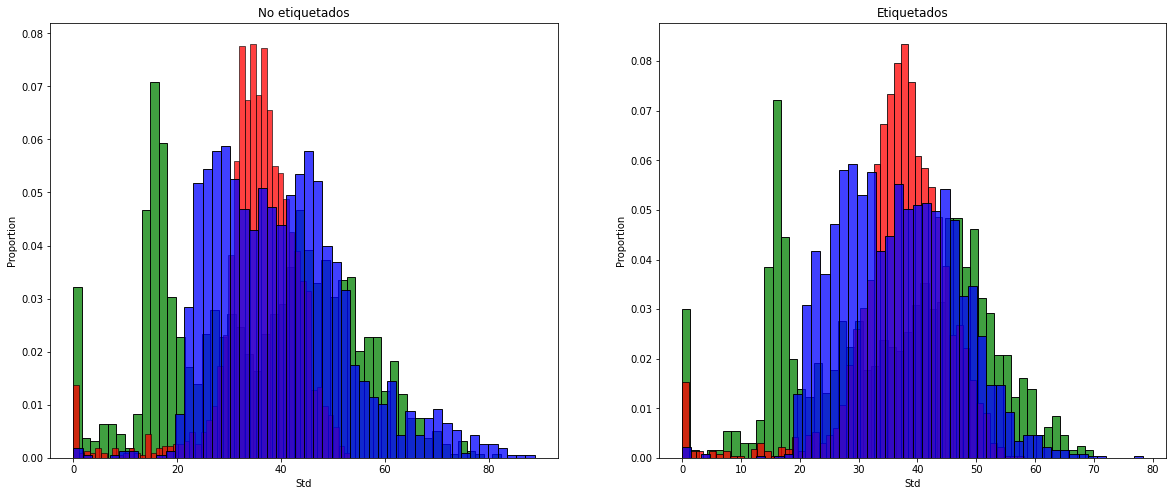

In [ ]:
plot_for_each_patient_unlabeled('Std')

##### Skew

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

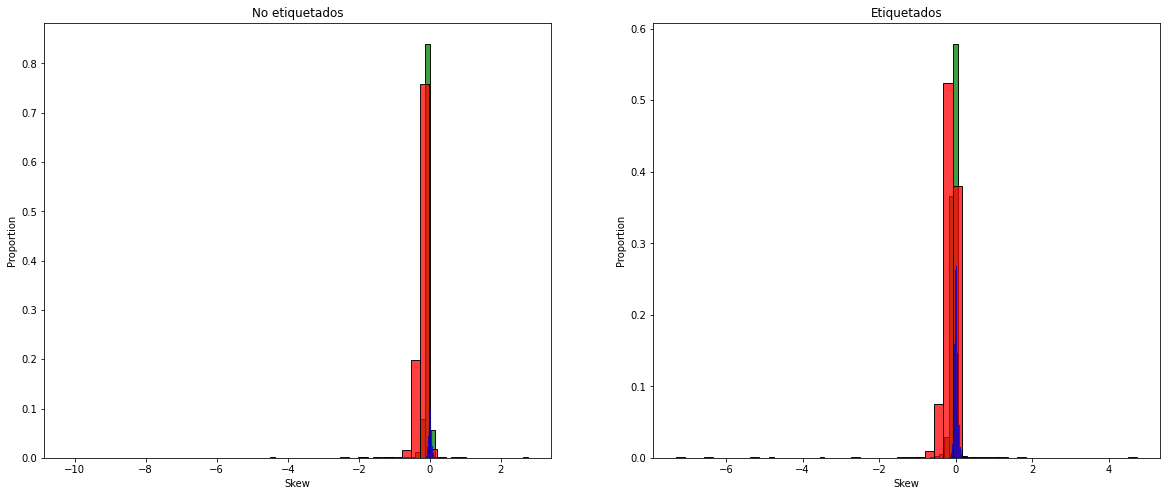

In [ ]:
plot_for_each_patient_unlabeled('Skew')

Haciendo una observacion visual de las distribuciones de los diferentes cuantificadores analizados en la seccion anterior, y comparando entre los conjuntos etiquetados y no etiquetados,
no se evidencian diferencias sustanciales entre ambos conjuntos de datos. Esto indica que se trata de dos conjuntos de datos similares, lo que podría sugerir que en los datos no etiquetados se encuentra información de similar naturaleza al de los datos etiquetados (datos pre-ictales e inter-ictales), por lo que podrían analizarse en conjunto.
Respecto a las visualizaciones por paciente sin tener en cuenta etiquetas, sí se observan diferencias entre las distribuciones de algunos cuantificadores, sobre todo en las métricas SE y LZC. Cuando incorporamos a la visualización  etiquetas por paciente, se observan más aun.